## Final Plots

## Plot 1: Block Low Frequencies

In [1]:
#InteractiveShell.ast_node_interactivity = "all"
from platform import python_version
import copy
import glob
import matplotlib
import os
from scipy.io import loadmat
import scipy.stats as stats
import sys
%matplotlib inline
import seaborn as sns
print(python_version())
import scipy.io as sio

%run -i 'PyFiles/imports.py'
%run -i 'PyFiles/helpers.py'
%run -i "PyFiles/experiment.py"
%run -i "PyFiles/analysis.py"



3.8.5


In [2]:
rand_path = 'final_results/*random.pickle'
random_path_list = glob.glob(rand_path)
over_ride_idx = [list(range(0, 37)) + list(range(150, 186)), list(range(37, 149 + 1))]

unif_hyper_params = {"uniform": {'input_scaling': 0.2073797732591629,
             'connectivity': 0.19523422552716585,
             'spectral_radius': 0.34749415528774263,
             'regularization': 10.109121495443558,
             'leaking_rate': 0.9935652056932449,
             'n_nodes': 1000,
             'feedback': False}}

random_expers = EchoStateAnalysis(random_path_list, model = "uniform",
                                  ip_use_observers = True, ip_method = "linear",
                                     force_random_expers = True, over_ride_idx = over_ride_idx, 
                                 over_ride_best_args = unif_hyper_params)

path_list  ['final_results/500_900Hz_random.pickle', 'final_results/150_500Hz_random.pickle']


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



split 0.5
dataset: shape, {'Obs_Tr': (1576, 73), 'Obs_Te': (1577, 73)}
self.prediction_typeexact
best_args {'input_scaling': 0.2073797732591629, 'connectivity': 0.19523422552716585, 'spectral_radius': 0.34749415528774263, 'regularization': 10.109121495443558, 'leaking_rate': 0.9935652056932449, 'n_nodes': 1000, 'feedback': False}
pure prediction with old data, no feedback not handled yet
in weight type uniform
BUILDING UNIFORM IN WEIGHTS
get_experiment_old model:  exponential
best_args {'noise': 1e-05, 'llambda': 1.0, 'llambda2': 1e-05, 'connectivity': 1.0, 'spectral_radius': 0.6661639981269837, 'regularization': 77.91245109792284, 'leaking_rate': 0.5436187071800231, 'n_nodes': 1000, 'random_seed': 123}
experiment inputs{'method': 'exact', 'split': 0.5, 'aspect': 0.9}
split 0.5
dataset: shape, {'Obs_Tr': (1576, 73), 'Obs_Te': (1577, 73)}
self.prediction_typeexact
best_args {'noise': 1e-05, 'llambda': 1.0, 'llambda2': 1e-05, 'connectivity': 1.0, 'spectral_radius': 0.6661639981269837, 'r

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



split 0.5
dataset: shape, {'Obs_Tr': (1576, 73), 'Obs_Te': (1577, 73)}
self.prediction_typeexact
best_args {'input_scaling': 0.2073797732591629, 'connectivity': 0.19523422552716585, 'spectral_radius': 0.34749415528774263, 'regularization': 10.109121495443558, 'leaking_rate': 0.9935652056932449, 'n_nodes': 1000, 'feedback': False}
pure prediction with old data, no feedback not handled yet
in weight type uniform
BUILDING UNIFORM IN WEIGHTS
get_experiment_old model:  exponential
best_args {'noise': 0.31622776601683794, 'llambda': 1e-05, 'llambda2': 1.0, 'connectivity': 1e-05, 'spectral_radius': 0.999, 'regularization': 2.3236147146584054, 'leaking_rate': 1.0, 'n_nodes': 1000, 'random_seed': 123}
experiment inputs{'method': 'exact', 'split': 0.5, 'aspect': 0.9}
split 0.5
dataset: shape, {'Obs_Tr': (1576, 73), 'Obs_Te': (1577, 73)}
self.prediction_typeexact
best_args {'noise': 0.31622776601683794, 'llambda': 1e-05, 'llambda2': 1.0, 'connectivity': 1e-05, 'spectral_radius': 0.999, 'regulariz

In [17]:
def get_target_freq(experiment):
    """
    
    """
    freq_spec_lst = np.array(experiment["f"])[experiment["resp_idx"]]
    target_freq_spec = np.round(np.mean(freq_spec_lst),1)
    return(target_freq_spec)

def IdxMatch(experiment, 
             resp_idx_range = range(272, 301), 
             n_obs = 28
             ):
    """
    obs3:
    obs4: resp_idx_range = range(272, 301) n_obs = 28
    obs5:
    """
    #if obs_idx_lst == experiment["obs_idx"]:
    #    if resp_idx_lst == experiment["resp_idx"]:
    #        return True
    resp_idx_list = list(resp_idx_range)
    if resp_idx_list == experiment["resp_idx"]:
        if n_obs == len(experiment["obs_idx"]):
            return True
    return False

def freq_plot(analysis_obj, experiment_num = 0, title = "Observer 4 experiment",  save = None,
             custom_colors = True, mean = False):
    """ 
    This function takes an EchoStateAnalysis object and creates a frequency loss plot.
    
    Arguments:
        analysis_obj: the EchoStateAnalysis object
        experiment_num: the index number of the EchoStateExperiment.
        title: the title of the experiment.
        save: the path to which to save the image.
    """
    freq_rDF = analysis_obj.rDF.copy()
    freq_loss_df =  freq_rDF[freq_rDF["experiment #"] == experiment_num]
    
    plt.figure(figsize = (12,5))
    modelz = np.unique(freq_loss_df.model)
    if custom_colors: #len(modelz) == 4 and
        palette_ = dict(zip(["uniform", "exponential", "cyclic", "random_uniform"], sns.color_palette("tab10")[0:4]))
        palette_["extrapolation"] = sns.color_palette("tab10")[4]
        palette_["interpolation"] = sns.color_palette("tab10")[5]
        palette_["zhizhuo"] = sns.color_palette("tab10")[6]
        palette_["ip: linear"] = sns.color_palette("tab10")[5]
        
    
    else:
        palette_ = dict(zip(modelz, sns.color_palette("tab10")[0:4]))
    palette_["ip: nearest"] = sns.color_palette("tab10")[1]
    for i, model in enumerate(modelz):
        
        freq_rDF_spec = freq_loss_df[freq_loss_df.model == model]
        mean_freq_rDF_spec = freq_rDF_spec.groupby(by = "freq").mean()
        mean_freq_rDF_spec["model"] = model
        
        #multi-model df concatenation
        if not i:
            mean_freq_rDF = mean_freq_rDF_spec 
        else: 
            mean_freq_rDF = pd.concat([mean_freq_rDF, mean_freq_rDF_spec], axis = 0)
        #model mean lines 
        plt.axhline(np.mean(freq_rDF_spec.L2), color = palette_[model], linestyle = "dotted")
    if mean:
        mean_freq_rDF["freq"] = list(mean_freq_rDF.index)
        
        sns.lineplot(x = "freq", y = "L2", data = mean_freq_rDF, alpha = 0.9, hue = "model", palette = palette_)
    else:
        sns.lineplot(x = "freq", y = "L2", data = freq_loss_df, alpha = 0.9, hue = "model", palette = palette_)
    
    plt.title(title, fontsize = 16)
    plt.xlabel("Frequency (Hz)", fontsize = 15)
    plt.ylabel("L2 Loss", fontsize = 15)
    
    if save:
        plt.savefig(save)


    
#pickle_A.experiment_lst[0] = pickle_zhizhuo.experiment_lst[0] 
def quick_plot(n, analysis, outfile = None, mean = False, rolling = 150, force_build = True, models = None):
    """
    """
    if type(analysis) != list:
        analysis = [analysis]
    
    #only save the plot if requested.
    if outfile:
        save_path = "fig/" + outfile 
        save_path_time = save_path + "_time"
        save_path_freq = save_path + "_freq"
    else:
        save_path_time, save_path_freq  = None, None
        outfile = ""
    
    for i, analysis_ in enumerate(analysis):
        try:
            models = analysis_.experiment_results[n].get_models()
        except:
            models = list(analysis_.experiment_lst[n]["prediction"].keys())
            print("MODELS", models)
        if not hasattr(analysis_, 'rDF'):
            models = ifdel(models, "interpolation")
            analysis_.build_loss_df(group_by = "freq", models = models)
        if force_build:
            models = ifdel(models, "interpolation")
            analysis_.build_loss_df(group_by = "freq", models = models)
        
        time_plot(analysis_, experiment_num = n, rolling = rolling, save = save_path_time,
              title = outfile + " Avg. L2 Loss vs Time (rolling average)", mean = mean)
        freq_plot(analysis_, n, title = outfile + " Avg. L2 Loss vs Frequency", 
                  save = save_path_freq, mean = mean)
        #plt.show()
    return analysis[0].rDF


In [18]:
def time_plot(analysis_obj, experiment_num = 0, title = "Observer 4 experiment", rolling = None, save = None,
             mean = False, custom_colors = True):
    """
    This function takes an EchoStateAnalysis object and creates a time loss plot.
    
    Arguments:
        analysis_obj: the EchoStateAnalysis object
        experiment_num: the index number of the EchoStateExperiment.
        title: the title of the experiment.
        save: the path to which to save the image.
    """
    
    time_rDF = analysis_obj.rDF.copy()
    time_loss_df =  time_rDF[time_rDF["experiment #"] == experiment_num].copy()
    
    plt.figure(figsize = (12,5))
    rollings = {}
    if custom_colors:
        palette_ = dict(zip(["uniform", "exponential", "cyclic", "random_uniform"], sns.color_palette("tab10")[0:4]))
        palette_["extrapolation"] = sns.color_palette("tab10")[4]
        palette_["interpolation"] = sns.color_palette("tab10")[5]
        palette_["zhizhuo"] = sns.color_palette("tab10")[6]
        palette_["ip: linear"] = sns.color_palette("tab10")[5]
    else:
        palette_ = dict(zip(modelz, sns.color_palette("tab10")[0:4]))
    palette_["ip: nearest"] = sns.color_palette("tab10")[1]
    unique_models = np.unique(time_loss_df.model)
    if rolling:
        #print("ROLLING", rolling)
        mean_ = []
        for i, model in enumerate(unique_models):
            filterr = time_loss_df["model"] == model
            time_rDF_spec = time_loss_df[filterr]
            time_rDF_spec["rolling_L2"] = -1
            time_loss_df["rolling_L2"] = -1
            
            #multi-model df concatenation
            if mean:
                time_sub_df = time_rDF_spec.groupby(by = "time").mean()
                time_sub_df["model"] = model

                time_sub_df.rolling_L2 = time_sub_df.L2.rolling(rolling).mean()

                if not i:
                    mean_time_rDF = time_sub_df
                    
                else: 
                    mean_time_rDF = pd.concat([mean_time_rDF, time_sub_df], axis = 0)
                    
                mean_time_rDF["time"] = list(mean_time_rDF.index)
                
            else:
                rollings[model] = time_rDF_spec.L2.rolling(rolling).mean()
            
            plt.axhline(np.mean(time_rDF_spec.L2.copy()), linewidth = 1.5,
                        color = palette_[model], linestyle = "dotted")
        
        

        for model in unique_models:
            if mean:
                pass
                #mean_time_rDF.rolling_L2[mean_time_rDF.model == model] = rollings[model]
                
            else:
                time_loss_df.rolling_L2[time_loss_df.model == model] = rollings[model]
        if mean:
  
            sns.lineplot(x = "time", y = "rolling_L2", data = mean_time_rDF, palette = palette_, 
                         alpha = 0.75, linewidth = 2.5, hue = "model") 
        else:
            sns.lineplot(x = "time", y = "rolling_L2", data = time_loss_df, palette = palette_, 
                         alpha = 0.85,linewidth = 1.5, hue = "model") 
    else:
        print("NAH", rolling)
        sns.lineplot(x = "time", y = "L2", data = time_loss_df,  alpha = 0.9, hue = "model")
    lb = 0
    ub = np.percentile(time_loss_df.L2, 95)
    title = title
    plt.title(title, fontsize = 25)
    plt.xlabel("Time (seconds)", fontsize = 17)
    plt.ylabel("L2 Loss $(y-\hat{y})^2$", fontsize = 17)
    plt.legend(prop={"size":12})
    sns.despine()
    if save:
        plt.savefig(save)
        




In [19]:
def rot_zhizhuo(arr, k = 3):
    return np.rot90(arr, k = k)

ylinear = rot_zhizhuo(sio.loadmat("/Users/hayden/Desktop/RC_LAB_Rabbit_hole/OB 150-500Hz/ylinear.mat")["ylinear"])
yzhizhuo_cyclic = rot_zhizhuo(sio.loadmat("/Users/hayden/Desktop/RC_LAB_Rabbit_hole/OB 150-500Hz/ypredict.mat")["y_predict"])
yzhizhuo_real = rot_zhizhuo(sio.loadmat("/Users/hayden/Desktop/RC_LAB_Rabbit_hole/OB 150-500Hz/yreal.mat")["y_real"])

insert_ = yzhizhuo_cyclic

random_expers.experiment_lst[0]["prediction"]["zhizhuo"] = insert_
random_expers.experiment_lst[1]["prediction"]["zhizhuo"] = insert_
exper_ = random_expers.experiment_lst[0]

Text(0.5, 1.0, 'exponential residuals block')

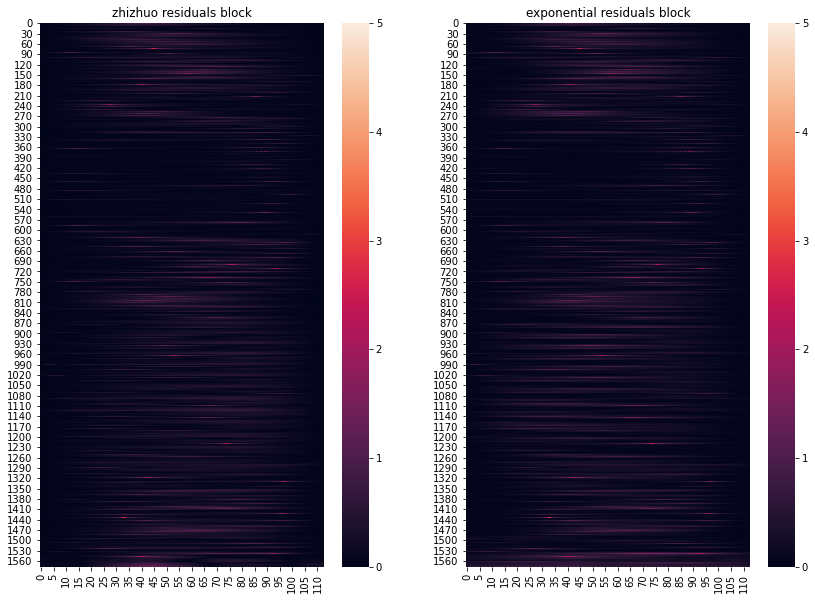

In [20]:
fig, ax = plt.subplots(1,2, figsize = (14,10)) 
sns.heatmap(np.abs(yzhizhuo_cyclic - exper_['xTe']), ax = ax[0], vmin=0, vmax=5)
sns.heatmap(np.abs(exper_["prediction"]["exponential"] - exper_['xTe']), ax = ax[1], vmin=0, vmax=5)
ax[0].set_title("zhizhuo residuals block")
ax[1].set_title("exponential residuals block")
#sns.heatmap(, ax = ax[1])

MODELS ['uniform', 'exponential', 'ip: linear', 'zhizhuo']


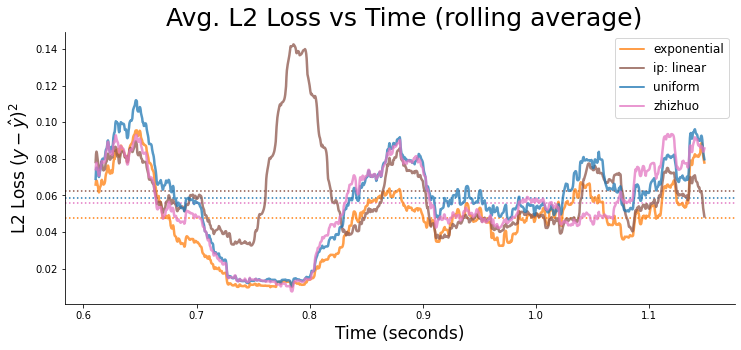

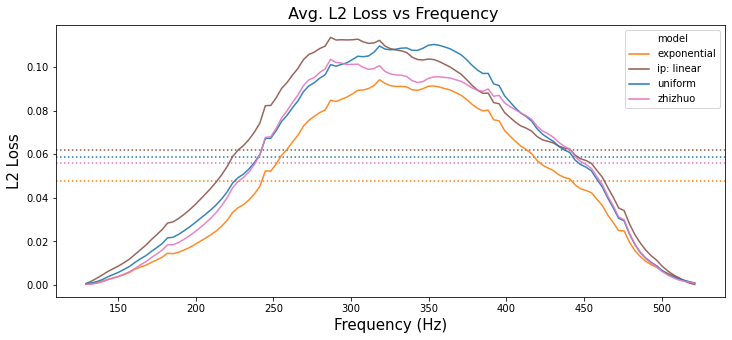

In [21]:
try:
    for i in range(len(random_expers.experiment_results)):
        quick_plot(i, random_expers, mean = True, rolling = 150)
except:
    for i in [1]:
        quick_plot(i, random_expers, mean = True, rolling = 100)

## Pure Predictions (gap 2)

In [22]:
#sio.loadmat().keys()

In [95]:
fp= "/Users/hayden/Desktop/Reservoir/MARIOS/experiment_results/medium/split_0.5/gap2_random_RC.pickle"

random_path_list = [ fp]
#import blobs
#blobs.decode('utf-8', 'ignore')


from tqdm.autonotebook import tqdm

def load_zhizhuo(fp, k = 0):
    dictt = sio.loadmat(fp)
    keys = list(dictt.keys())
    first_key = keys[3]
    print(keys)
    
    return rot_zhizhuo(dictt[first_key], k = k).T


pure_pred_expers = EchoStateAnalysis(random_path_list, model = "uniform",
                              ip_use_observers = True, ip_method = "linear",
                                 force_random_expers = True)
    
#zhizhuo_gap4 = rot_zhizhuo(sio.loadmat("/Users/hayden/Desktop/yhat_903_100.mat")["yhat903"])



#rot_zhizhuo(sio.loadmat("/Users/hayden/Desktop/RC_LAB_Rabbit_hole/gap2/y_predict_w100.mat")['ytestpredict_gap2'], k = 0).T



y_real_gap2=rot_zhizhuo(sio.loadmat("/Users/hayden/Desktop/RC_LAB_Rabbit_hole/gap2/yreal.mat")["ytest"],
                        k = 0).T
pure_pred_expers.experiment_results[0].rename_model("interpolation", "extrapolation")
zhizhuo_ip_gap2 = rot_zhizhuo(sio.loadmat("/Users/hayden/Desktop/RC_LAB_Rabbit_hole/gap2/interp_514_100.mat")['ytesthat'], k = 0).T

gap2_idx = pure_pred_expers.experiment_results[0].data.sets["Target_Te"].time_indices_


path_list  ['/Users/hayden/Desktop/Reservoir/MARIOS/experiment_results/medium/split_0.5/gap2_random_RC.pickle']



experiment_results [<PyFiles.experiment.ExperResult object at 0x7ffc91a4ecd0>]


Let's not fix something that ain't broken.



In [96]:
zhizhuo_gap2 = load_zhizhuo("/Users/hayden/Desktop/RC_LAB_Rabbit_hole/gap2/y_predict_w100.mat")

['__header__', '__version__', '__globals__', 'y_predict_w100']


random_uniform
extrapolation



random_uniform
extrapolation



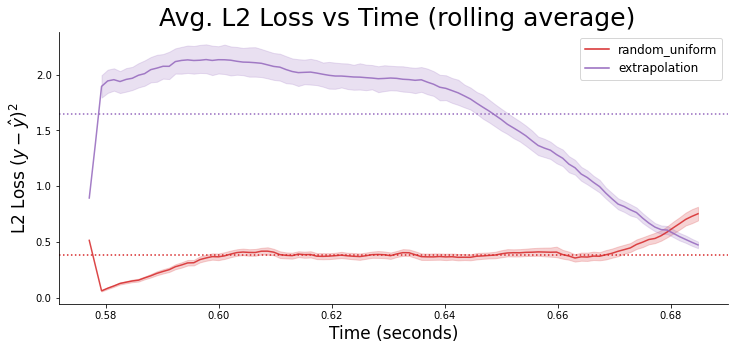

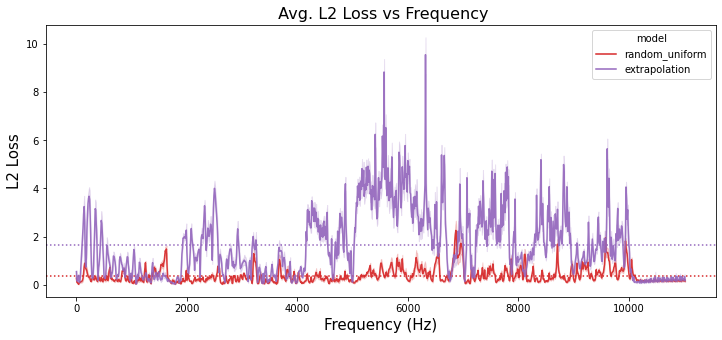

In [97]:
try:
    for i in range(len(pure_pred_expers.experiment_results)):
        quick_plot(i, pure_pred_expers, mean = False, rolling = 3)
except:
    for i in range(len(pure_pred_expers.experiment_lst)):
        quick_plot(i, pure_pred_expers, mean = False, rolling = 150)
    #show_images(column_expers)

In [98]:
pure_pred_expers.experiment_results[0].add_model_result(prediction = zhizhuo_gap2, 
                                                         ground_truth =  y_real_gap2, 
                                                         name = "zhizhuo")
#pure_pred_expers.experiment_results[0].add_model_result(prediction = zhizhuo_ip_gap2, 
#                                                     ground_truth =  y_real_gap2, 
#                                                     name = "interpolation")

random_uniform
extrapolation
zhizhuo



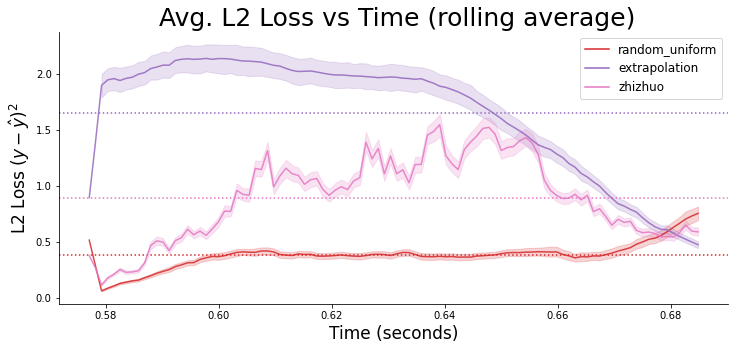

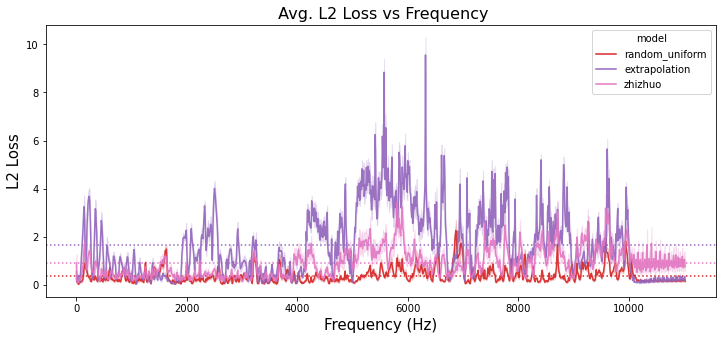

In [109]:
try:
    for i in range(len(pure_pred_expers.experiment_results)):
        quick_plot(i, pure_pred_expers, mean = False, rolling = 3)
except:
    for i in range(len(pure_pred_expers.experiment_lst)):
        quick_plot(i, pure_pred_expers, mean = True, rolling = 150)
    #show_images(column_expers)

test (1103, 100)
ip (1103, 100)
(1103, 200)
(1103, 100)


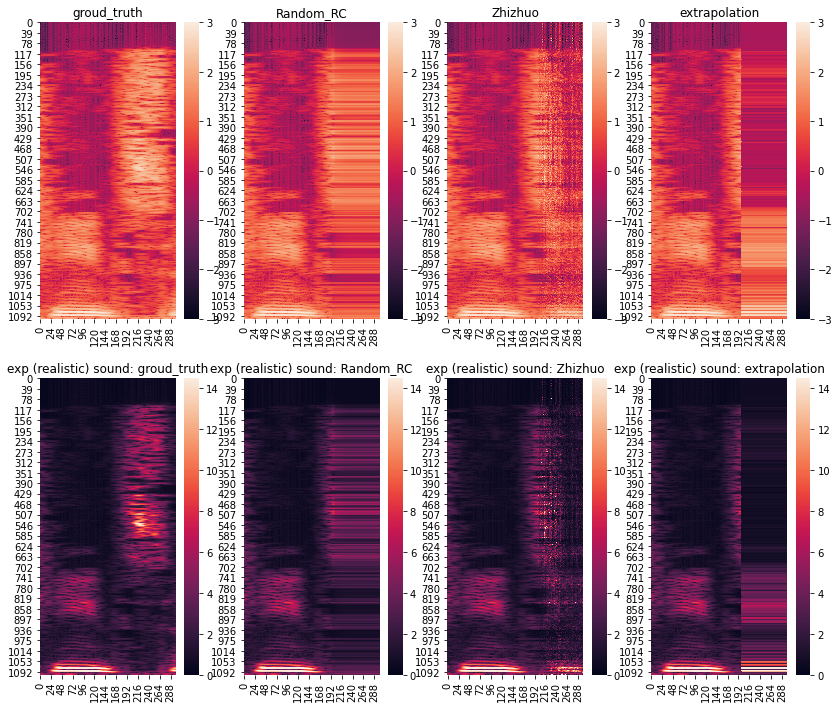

In [108]:

test = pure_pred_expers.experiment_results[0].data.Target_Te_.T
random_unif = pure_pred_expers.experiment_results[0].get_model_result("random_uniform").prediction.T
zhizhuo = zhizhuo_gap2.T
#ip = zhizhuo_ip_gap2.T
extrapolation = pure_pred_expers.experiment_results[0].get_model_result('extrapolation').prediction.T
print("test", test.shape)
print("ip", ip.shape)

train = pure_pred_expers.experiment_results[0].data.Target_Tr_.T
print(train.shape)
print(test.shape)
#vmax_args = {"vmin" : -3 , "vmax": 3}
fig, ax  = plt.subplots(2,4, figsize = (14,12))
ax = ax.flatten()
titles = ["groud_truth", "Random_RC", "Zhizhuo", "extrapolation"]
for i, dataset in enumerate([test, random_unif, zhizhuo, extrapolation]): #ip]):
    modified_dataset = np.hstack((train, dataset))
    sns.heatmap(np.flip(modified_dataset,axis = 0), ax = ax[i], vmin = -3 , vmax = 3) # **vmax_args,
    ax[i].set_title(titles[i])
for i, dataset in enumerate([test, random_unif, zhizhuo, extrapolation]):
    modified_dataset = np.hstack((train, dataset))
    sns.heatmap(np.flip(np.exp(modified_dataset), axis = 0), ax = ax[i+4], vmin = 0  , vmax = 14.5) # **vmax_args,
    ax[i+4].set_title("exp (realistic) sound: " + titles[i])

<AxesSubplot:>

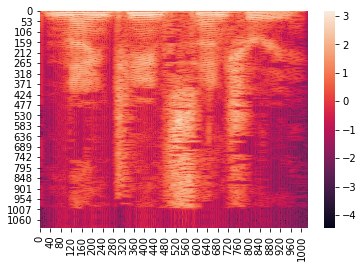

In [101]:
sns.heatmap( pure_pred_expers.experiment_results[0].data.A_.T)

Text(0.5, 1.0, 'Residuals, Hayden Gap 2')

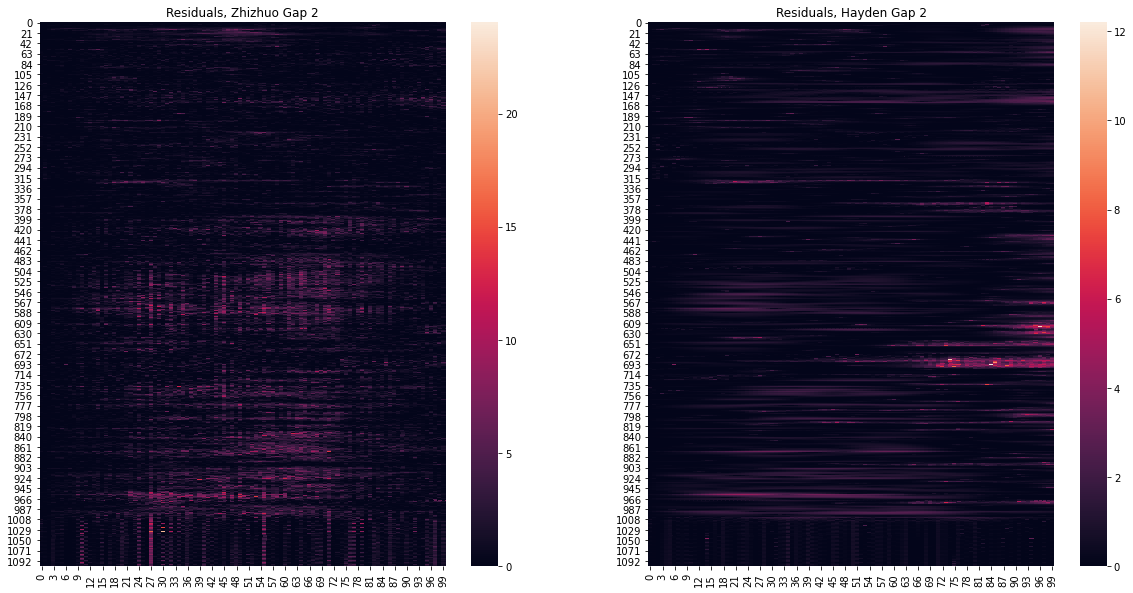

In [102]:
fig, ax = plt.subplots(1,2,figsize = (20,10))
sns.heatmap((zhizhuo - test)**2, ax = ax[0])
sns.heatmap((random_unif - test)**2, ax = ax[1])
ax[0].set_title("Residuals, Zhizhuo Gap 2")
ax[1].set_title("Residuals, Hayden Gap 2")

In [103]:
gap2_ip = pure_pred_expers.experiment_results[0].get_model_result('extrapolation').prediction
dictt = {"prediction" : gap2_ip.T}
sio.savemat("extrapolation.mat", dictt)

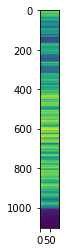

In [112]:
plt.imshow(random_unif)

In [113]:

dictt = {"prediction" : random_unif}
sio.savemat("random_RC.mat", dictt)

## Pure Prediction: Gap_4


In [32]:
fp="/Users/hayden/Desktop/Reservoir/MARIOS/experiment_results/medium/split_0.5/Gap4_Random_RC.pickle"
random_path_list = [fp]
def rot_zhizhuo(arr, k = 3):
    return np.rot90(arr, k = k)

from tqdm.autonotebook import tqdm


pure_pred_expers = EchoStateAnalysis(random_path_list, model = "uniform",
                              ip_use_observers = True, ip_method = "linear",
                                 force_random_expers = True)
pure_pred_expers.experiment_results[0].rename_model("interpolation", "extrapolation")
    
#zhizhuo_gap4 = rot_zhizhuo(sio.loadmat("/Users/hayden/Desktop/yhat_903_100.mat")["yhat903"])

zhizhuo_gap4 = rot_zhizhuo(sio.loadmat("/Users/hayden/Desktop/RC_LAB_Rabbit_hole/gap4/yhat_gap4.mat")['ytestpredict_Gap4'], k = 0).T
y_real_gap4=rot_zhizhuo(sio.loadmat("/Users/hayden/Desktop/RC_LAB_Rabbit_hole/gap4/yreal_903_100.mat")["yreal903"],
                        k = 0).T
zhizhuo_ip_gap4 = rot_zhizhuo(sio.loadmat("/Users/hayden/Desktop/RC_LAB_Rabbit_hole/gap4/interp_903_100.mat")['ytesthat'], k = 0).T

path_list  ['/Users/hayden/Desktop/Reservoir/MARIOS/experiment_results/medium/split_0.5/Gap4_Random_RC.pickle']



experiment_results [<PyFiles.experiment.ExperResult object at 0x7ffc58356790>]


Let's not fix something that ain't broken.



random_uniform
extrapolation



random_uniform
extrapolation



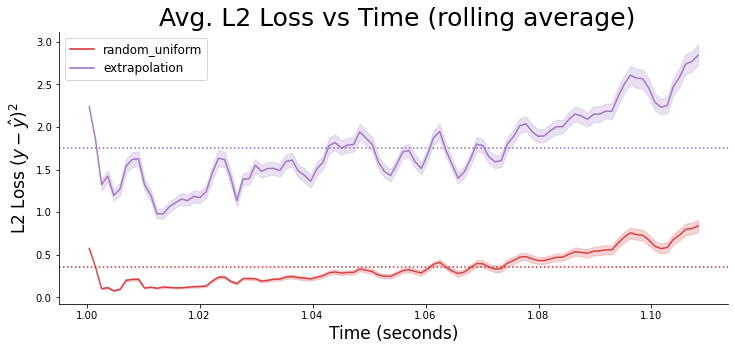

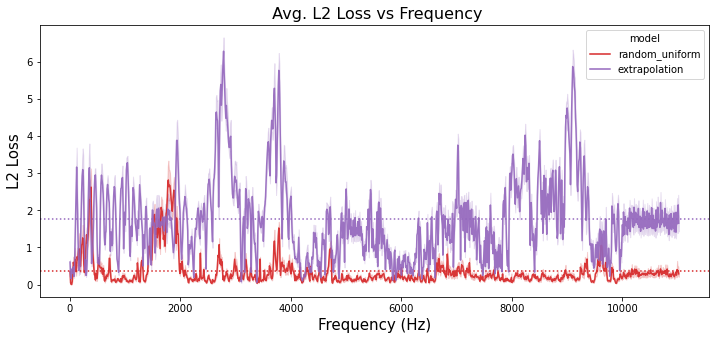

In [33]:
try:
    for i in range(len(pure_pred_expers.experiment_results)):
        quick_plot(i, pure_pred_expers , mean = False, rolling = 3)
except:
    for i in range(len(pure_pred_expers.experiment_lst)):
        quick_plot(i, pure_pred_expers, mean = True, rolling = 150)
    #show_images(column_expers)

test (1103, 100)
ip (1103, 100)
(1103, 200)
(1103, 100)


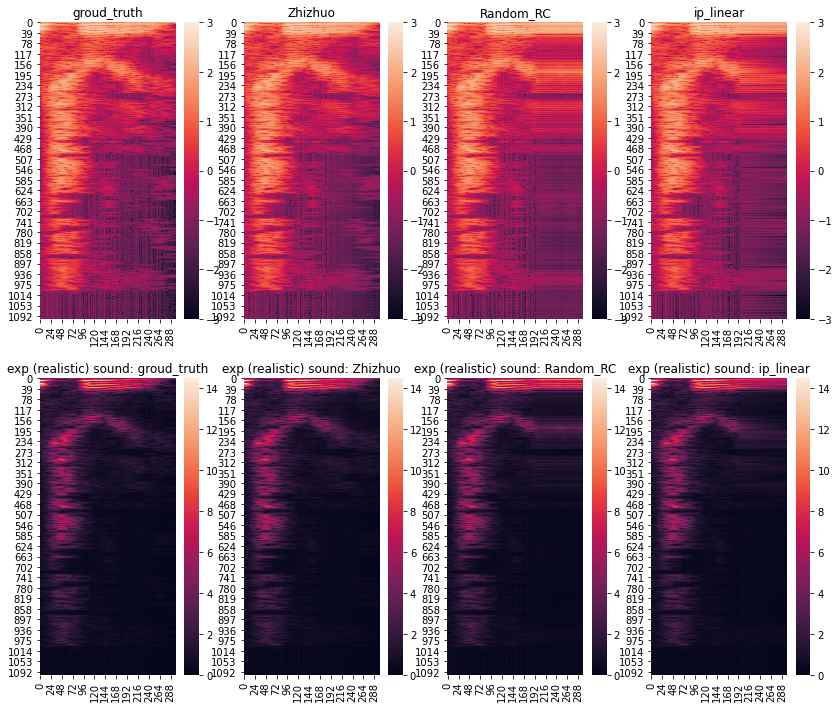

In [34]:
test = pure_pred_expers.experiment_results[0].data.Target_Te_.T
random_unif = pure_pred_expers.experiment_results[0].get_model_result("random_uniform").prediction.T
zhizhuo = zhizhuo_gap4.T
ip = zhizhuo_ip_gap4.T
print("test", test.shape)
print("ip", ip.shape)

train = pure_pred_expers.experiment_results[0].data.Target_Tr_.T
print(train.shape)
print(test.shape)
#vmax_args = {"vmin" : -3 , "vmax": 3}
fig, ax  = plt.subplots(2,4, figsize = (14,12))
ax = ax.flatten()
titles = ["groud_truth",  "Zhizhuo", "Random_RC", "ip_linear"]
for i, dataset in enumerate([test, zhizhuo, random_unif,  ip]):
    modified_dataset = np.hstack((train, dataset))
    sns.heatmap(modified_dataset, ax = ax[i], vmin = -3 , vmax = 3) # **vmax_args,
    ax[i].set_title(titles[i])
for i, dataset in enumerate([test, zhizhuo, random_unif, ip]):
    modified_dataset = np.hstack((train, dataset))
    sns.heatmap(np.exp(modified_dataset), ax = ax[i+4], vmin = 0  , vmax = 14.5) # **vmax_args,
    ax[i+4].set_title("exp (realistic) sound: " + titles[i])

In [35]:
 pure_pred_expers.experiment_results[0].add_model_result(prediction = zhizhuo_gap4, 
                                                         ground_truth =  y_real_gap4, 
                                                         name = "zhizhuo")
#pure_pred_expers.experiment_results[0].add_model_result(prediction = zhizhuo_ip_gap4, 
#                                                     ground_truth =  y_real_gap4, 
#                                                     name = "interpolation")

random_uniform
extrapolation
zhizhuo



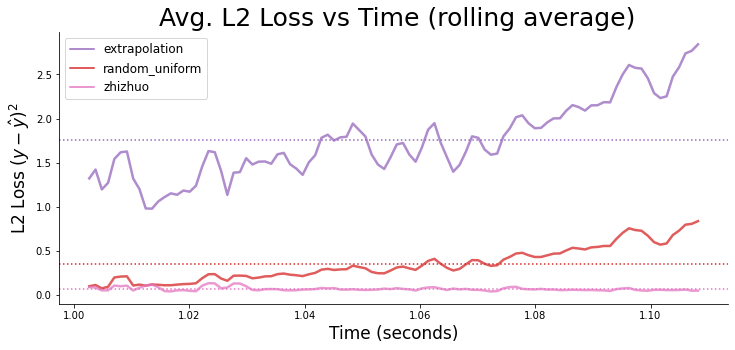

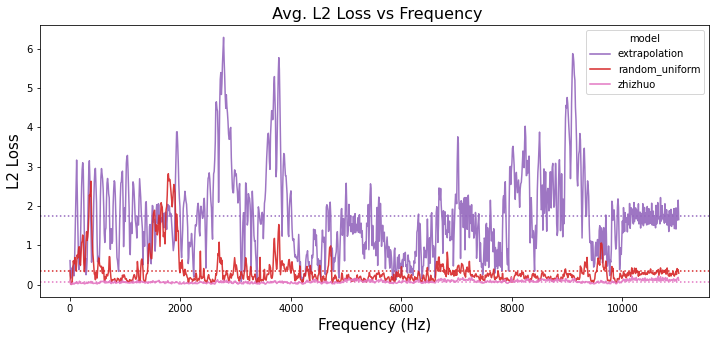

In [36]:
try:
    for i in range(len(pure_pred_expers.experiment_results)):
        quick_plot(i, pure_pred_expers , mean = True, rolling = 3)
except:
    for i in range(len(pure_pred_expers.experiment_lst)):
        quick_plot(i, pure_pred_expers, mean = True, rolling = 150)
    #show_images(column_expers)

In [37]:
pure_pred_expers.experiment_results[0].get_models()

['random_uniform', 'extrapolation', 'zhizhuo']

Text(0.5, 1.0, 'Residuals, Zhizhuo Gap 4')

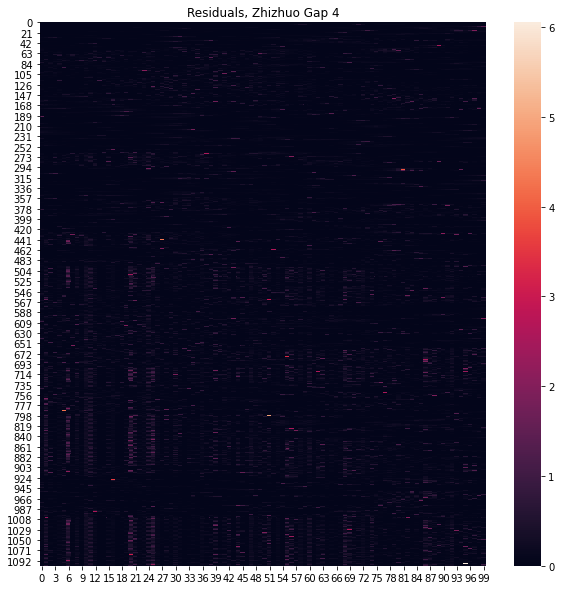

In [38]:
plt.figure(figsize = (10,10))
sns.heatmap((zhizhuo - test)**2)
plt.title("Residuals, Zhizhuo Gap 4")

In [39]:
pure_pred_expers.experiment_results[0].get_models()

gap4_idx = pure_pred_expers.experiment_results[0].data.sets["Target_Te"].time_indices_

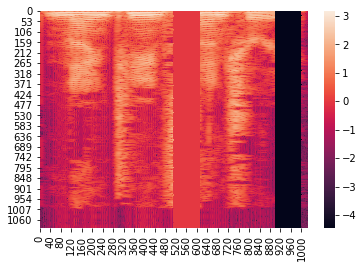

In [40]:
data = pure_pred_expers.experiment_results[0].data.A_
#corruption start1
data[gap2_idx,:] = 0#np.min(data)
#corruption end:
data[gap4_idx,:] = np.min(data)
corrupt_spectrogram = data.T.copy()
sns.heatmap(corrupt_spectrogram)
plt.show()

In [41]:
corrupt_spectrogram_dict = {"M":corrupt_spectrogram}
from scipy.io import savemat

In [42]:
savemat("A_corrupted.mat", corrupt_spectrogram_dict)